In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud as wc, STOPWORDS as sw

In [6]:
df=pd.read_csv("Flipkart Reviews Sentiment analysis.csv")
df.head(1)

,product_name,product_price,Rating,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.00,5,super!,great cooler excellent air flow and for this p...,positive


## EXPLORATORY ANALYSIS & CLEANING

In [7]:
df.shape

(205052, 6)

In [8]:
df.describe()

,product_name,product_price,Rating,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299.00,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [9]:
df.columns

Index(['product_name', 'product_price', 'Rating', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rating         205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 4.7+ MB


In [11]:
df.isnull().sum()

product_name         0
product_price        0
Rating               0
Review           24664
Summary             11
Sentiment            0
dtype: int64

<AxesSubplot:>

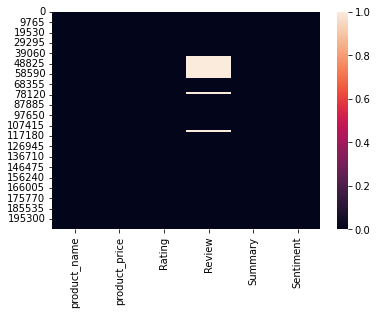

In [12]:
sns.heatmap(df.isnull())

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

product_name     0
product_price    0
Rating           0
Review           0
Summary          0
Sentiment        0
dtype: int64

<AxesSubplot:>

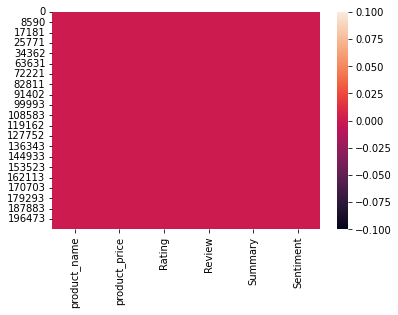

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.shape

(180379, 6)

## ANALYSIS

In [17]:
df.head(1)

,product_name,product_price,Rating,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.00,5,super!,great cooler excellent air flow and for this p...,positive


In [25]:
df.product_name.nunique()

841

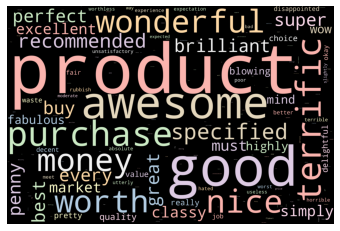

In [19]:
text = " ".join(i for i in df.Review)
word_cloud = wc(
        width=3000,
        height=2000,
        random_state=1,
        background_color="black",
        colormap="Pastel1",
        collocations=False,
        stopwords=sw,
        ).generate(text)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [20]:
N=df['Sentiment'].value_counts()
s=df['Sentiment'].unique()

<BarContainer object of 3 artists>

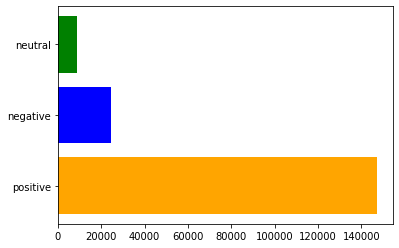

In [21]:
plt.barh(s,N,color={'green','orange','blue'})

In [22]:
df=df.drop(index={17299,175895,175906})

In [23]:
rc=df.Rating.value_counts()
r=df.Rating.unique()

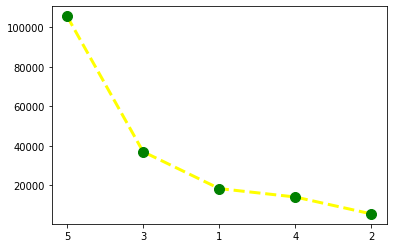

In [24]:
plt.plot(r,rc,linestyle='dashed',linewidth=3,color='yellow',marker="o",ms=10,mec='green',mfc='green')